In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

In [16]:
data_dir = "C:/Users/CRIZMA/depi-land-type-classification-final-project/EuroSAT/"
classes = os.listdir(data_dir)
print("Classes:", classes)

Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


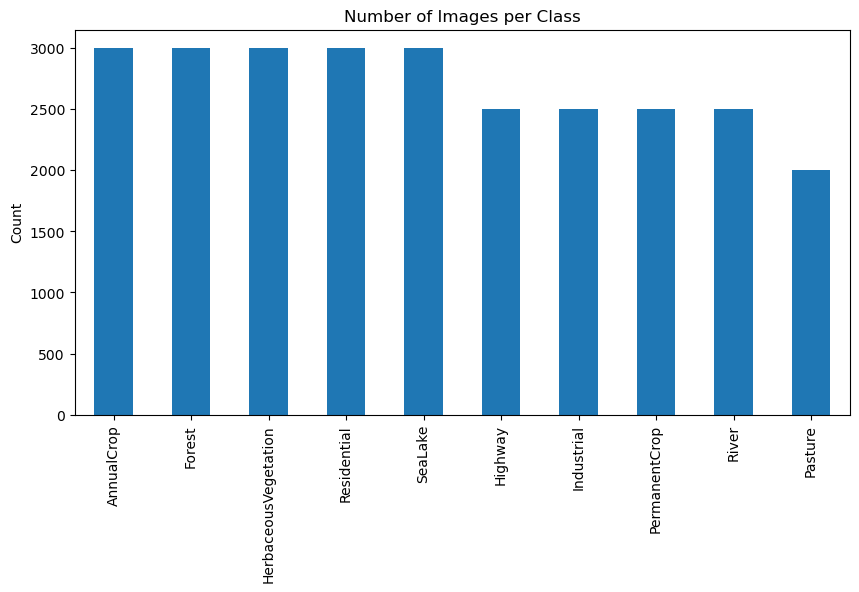

In [17]:
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
df_counts.sort_values(by="Image Count", ascending=False).plot(kind='bar', figsize=(10,5), legend=False)
plt.title("Number of Images per Class")
plt.ylabel("Count")
plt.show()

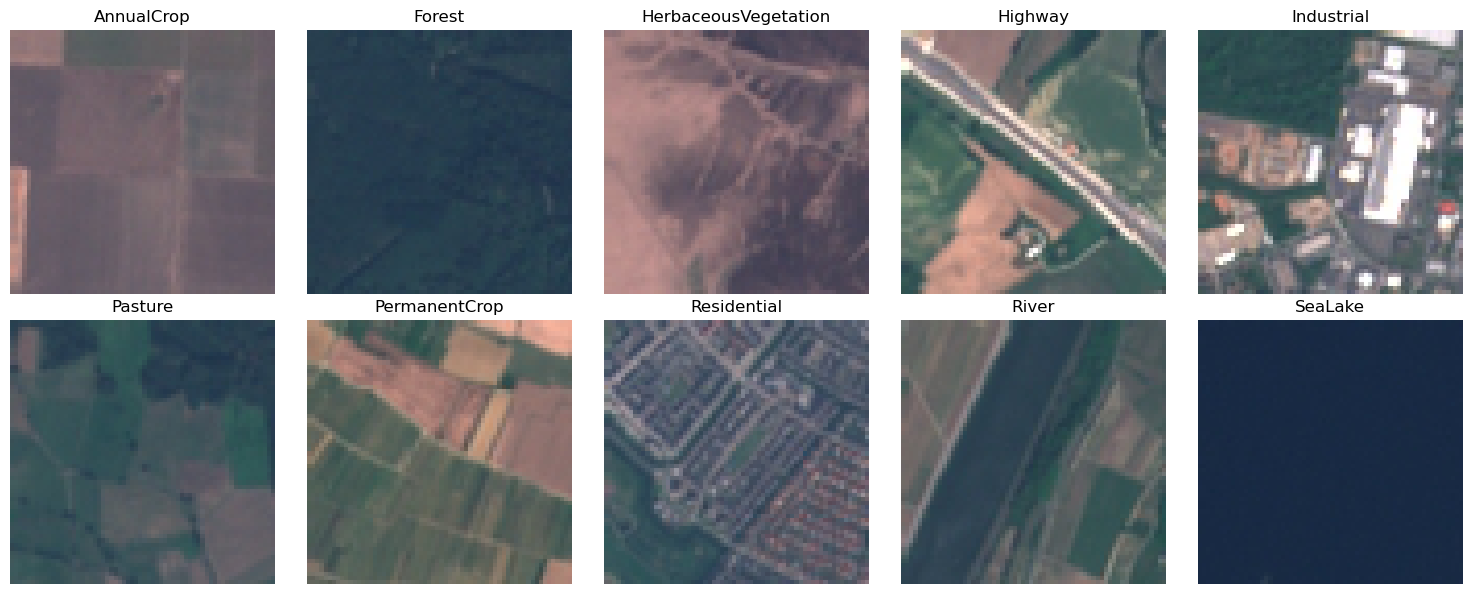

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, cls in enumerate(classes[:10]):
    folder = os.path.join(data_dir, cls)
    
    image_files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.jpeg', '.png', '.tif'))]
    
    if image_files:
        img_path = os.path.join(folder, image_files[0])
        try:
            img = Image.open(img_path)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            axs[i].imshow(img)
            axs[i].set_title(cls)
            axs[i].axis('off')
        except Exception as e:
            axs[i].text(0.5, 0.5, "Error loading image", ha='center')
            axs[i].axis('off')
    else:
        axs[i].set_title(f"{cls} (No images)")
        axs[i].axis('off')

plt.tight_layout()
plt.show()


In [19]:
img_shapes = []
for cls in classes:
    folder = os.path.join(data_dir, cls)
    sample_img = Image.open(os.path.join(folder, os.listdir(folder)[0]))
    img_shapes.append(np.array(sample_img).shape)

print("Unique Image Shapes:", set(img_shapes))

Unique Image Shapes: {(64, 64, 3)}


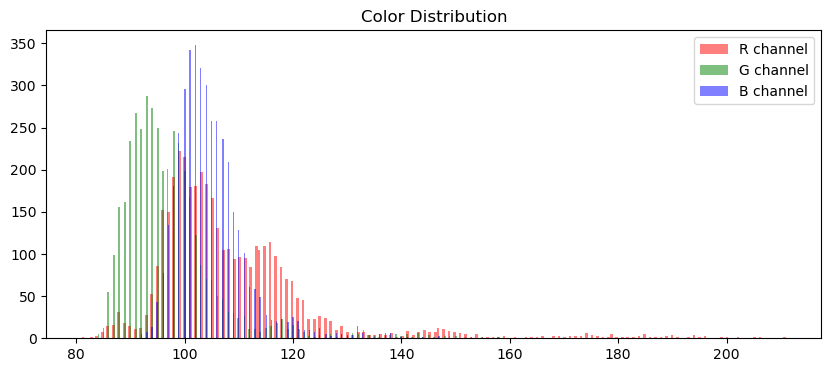

In [21]:
sample_path = os.path.join(data_dir, classes[0], os.listdir(os.path.join(data_dir, classes[0]))[0])
img = np.array(Image.open(sample_path))

plt.figure(figsize=(10,4))
colors = ('r','g','b')
for i, color in enumerate(colors):
    plt.hist(img[:,:,i].ravel(), bins=256, color=color, alpha=0.5, label=f'{color.upper()} channel')
plt.legend()
plt.title("Color Distribution")
plt.show()


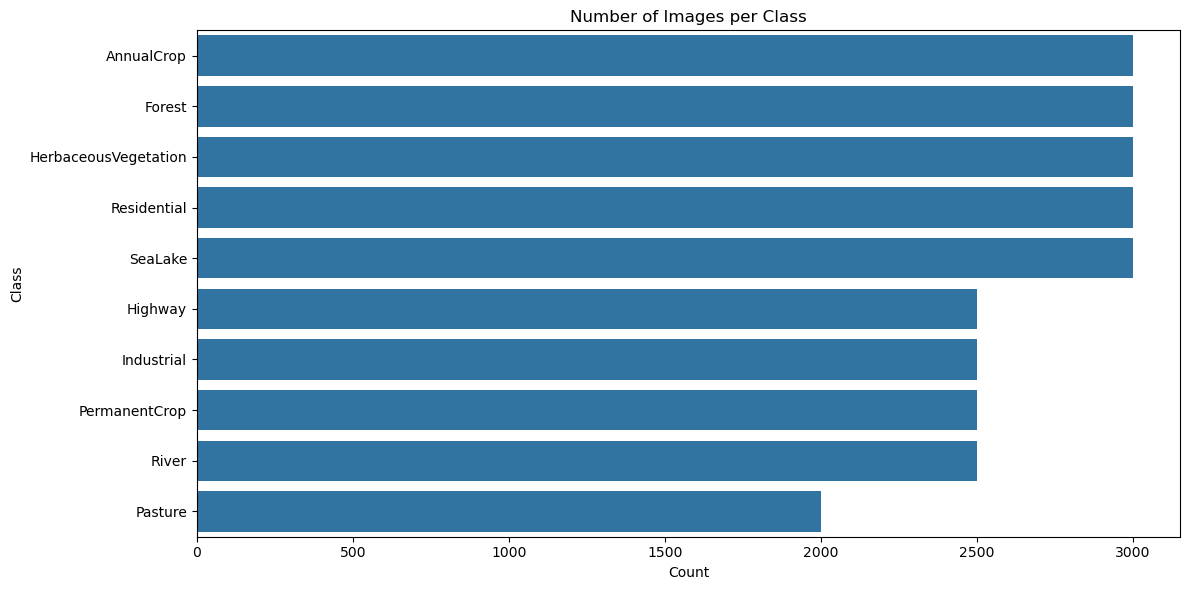

In [24]:
class_counts = {cls: len([f for f in os.listdir(os.path.join(data_dir, cls)) 
                          if f.endswith(('.jpg', '.jpeg', '.png', '.tif'))]) for cls in classes}

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Image Count", y="Class", data=df_counts.sort_values("Image Count", ascending=False))
plt.title("Number of Images per Class")
plt.xlabel("Count")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

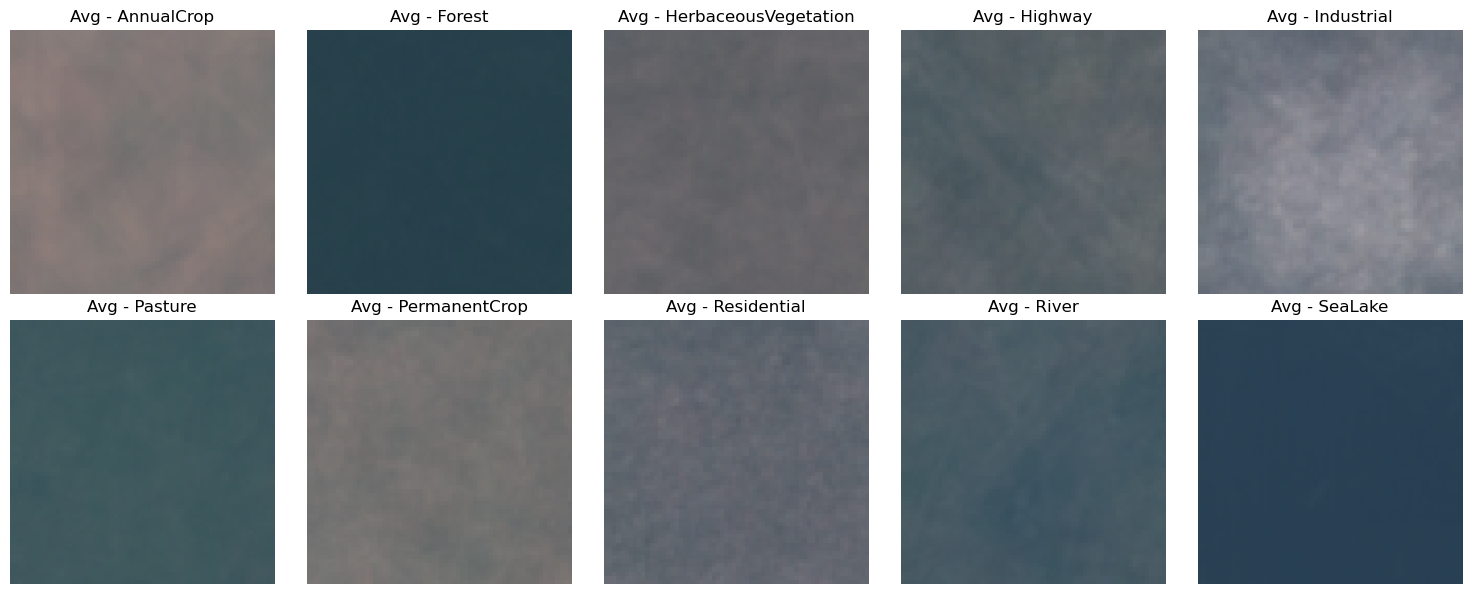

In [25]:
def get_avg_image(img_paths):
    imgs = []
    for path in img_paths[:50]:  # Limit to 50 for speed
        try:
            img = Image.open(path).resize((64, 64)).convert('RGB')
            imgs.append(np.array(img))
        except:
            continue
    return np.mean(imgs, axis=0).astype(np.uint8)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, cls in enumerate(classes[:10]):
    folder = os.path.join(data_dir, cls)
    image_files = [os.path.join(folder, f) for f in os.listdir(folder) 
                   if f.endswith(('.jpg', '.jpeg', '.png', '.tif'))]
    
    avg_img = get_avg_image(image_files)
    axs[i].imshow(avg_img)
    axs[i].set_title(f"Avg - {cls}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

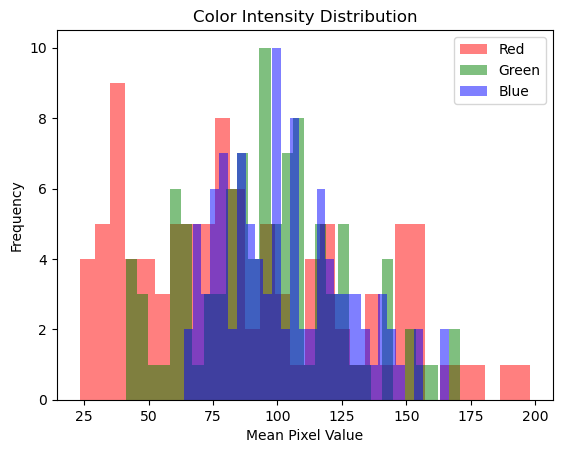

In [26]:
r_means, g_means, b_means = [], [], []

for cls in classes:
    folder = os.path.join(data_dir, cls)
    image_files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.jpeg', '.png', '.tif'))]
    
    for f in image_files[:10]:  # Sample 10 images per class
        img_path = os.path.join(folder, f)
        try:
            img = Image.open(img_path).convert("RGB")
            img_arr = np.array(img)
            r_means.append(np.mean(img_arr[:, :, 0]))
            g_means.append(np.mean(img_arr[:, :, 1]))
            b_means.append(np.mean(img_arr[:, :, 2]))
        except:
            continue

plt.hist(r_means, bins=30, alpha=0.5, label='Red', color='r')
plt.hist(g_means, bins=30, alpha=0.5, label='Green', color='g')
plt.hist(b_means, bins=30, alpha=0.5, label='Blue', color='b')
plt.legend()
plt.title("Color Intensity Distribution")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.show()